# Analysis of TEBD on the Ising Model

In [1]:
from typing import Optional

import matplotlib.pyplot as plt
import numpy as np
import quimb.tensor as qtn

from tebd.hamiltonian import LocalIsingHamiltonian
from tebd.hamiltonian import IsingHamiltonian
from tebd.matrix_product_states import MatrixProductState
from tebd.tebd import run_tebd
from tebd.tebd import TEBD

In [7]:
def run_tebd_ising(
        N: int, bond_dim: int, J: float, lmda: float, tau: float, num_iter: int, mid_steps: int,
        print_to_stdout: Optional[bool] = True, evol_type: Optional[str] = "imag",
):
    d = 2

    MPS = MatrixProductState(d=d, N=N, bond_dim=bond_dim)

    # create Hamiltonians
    loc_ham_ising = LocalIsingHamiltonian(N, J, lmda)
    glob_ham_ising = IsingHamiltonian(N, J, lmda)

    # create TEBD object
    tebd_obj = TEBD(MPS, loc_ham_ising, glob_ham_ising, evol_type=evol_type)

    # run algorithm
    energies, wave_functions = run_tebd(tebd_obj, tau, num_iter, mid_steps, print_to_stdout)

    return energies, wave_functions

## Effect of Bond Dimension

In [8]:
N = 10

In [9]:
J = 1
lmda = 0

In [10]:
tau = 0.01
num_iter = 1000
mid_steps = 10

In [15]:
bond_dim = 2
energies_2, wave_functions_2 = run_tebd_ising(N, bond_dim, J, lmda, tau, num_iter, mid_steps, print_to_stdout=False)

In [14]:
bond_dim = 10
energies_10, wave_functions_10 = run_tebd_ising(N, bond_dim, J, lmda, tau, num_iter, mid_steps, print_to_stdout=False)

In [18]:
bond_dim = 20
energies_20, wave_functions_20 = run_tebd_ising(N, bond_dim, J, lmda, tau, num_iter, mid_steps, print_to_stdout=False)

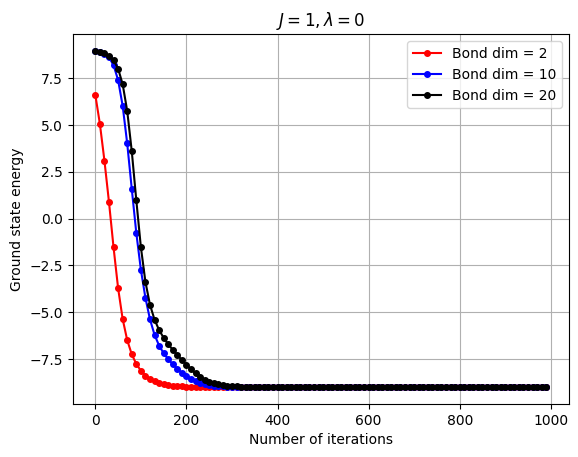

In [20]:
plt.plot(range(0, num_iter, mid_steps), energies_2, 'ro-', label="Bond dim = 2", markersize=4)
plt.plot(range(0, num_iter, mid_steps), energies_10, 'bo-', label="Bond dim = 10", markersize=4)
plt.plot(range(0, num_iter, mid_steps), energies_20, 'ko-', label="Bond dim = 20", markersize=4)
plt.xlabel("Number of iterations")
plt.ylabel("Ground state energy")
plt.legend()
plt.title("$J=1, \lambda=0$")
plt.grid()
plt.savefig('../figures/ground_state_energy_vs_iterations_diff_bond_dim.png', bbox_inches='tight', dpi=300);